### Telco Customer Churn Analysis and Prediction

This Notebook provides analysis and prediction of customer churn for a telecommunications company. The notebook includes data loading, exploration, preprocessing, feature engineering, model training, evaluation, and visualization.

#### Sections:

1. **Import Libraries**
   - Import necessary libraries for data manipulation, visualization, and machine learning.
   - Suppress warnings for cleaner output.

2. **Load & Explore Data**
   - Load the Telco Customer Churn dataset.
   - Display the first few rows of the dataset to understand its structure.

3. **Profile Data**
   - Generate a profiling report using `ydata_profiling` to get an overview of the dataset.
   - Identify imbalances in the churn data.

4. **Data Cleaning & Preprocessing**
   - Display column names.
   - Analyze demographic data using count plots.
   - Clean the `TotalCharges` column by converting it to numeric and handling missing values.

5. **Feature Engineering**
   - Separate categorical and numerical features.
   - Encode categorical features using `LabelEncoder`.
   - Merge numerical and encoded categorical features into a final DataFrame.

6. **Split Data**
   - Drop missing values and unnecessary columns.
   - Split the data into training and testing sets.

7. **Handle the Churn Imbalance**
   - Use SMOTE (Synthetic Minority Over-sampling Technique) to balance the training dataset.

8. **Train the Model**
   - Train a RandomForestClassifier on the balanced training data.

9. **Make Predictions**
   - Make predictions on the test data and calculate accuracy.

10. **Example of Binning**
    - Demonstrate feature engineering by binning the `tenure` column into predefined categories.

11. **Hyperparameter Tuning with GridSearchCV**
    - Perform hyperparameter tuning using GridSearchCV to find the best parameters for the RandomForestClassifier.

12. **Evaluating the Model on the Test Set**
    - Evaluate the model using classification metrics and ROC AUC score.

13. **Evaluate the Model**
    - Calculate and print evaluation metrics (accuracy, precision, recall, F1-score, ROC AUC).
    - Plot confusion matrix, ROC curve, and precision-recall curve for visual evaluation.

### Key Steps and Outputs:

- **Data Loading and Exploration**: Load the dataset and display the first few rows to understand the data structure.
- **Data Profiling**: Generate a profiling report to get an overview of the dataset and identify imbalances.
- **Data Cleaning**: Clean the `TotalCharges` column and handle missing values.
- **Feature Engineering**: Encode categorical features and bin the `tenure` column.
- **Model Training**: Train a RandomForestClassifier and perform hyperparameter tuning.
- **Model Evaluation**: Evaluate the model using various metrics and visualize the results.

### Conclusion:

This notebook provides a detailed workflow for analyzing and predicting customer churn using machine learning techniques. It includes data preprocessing, feature engineering, model training, hyperparameter tuning, and evaluation, making it a comprehensive guide for similar predictive modeling tasks.

- © 2025 CodeRod Solutions LLC. All rights reserved.
- Author Rod Morrison with inspiration from Kaggle

**Import Libraries**

In [85]:
# Import the libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve
from imblearn.over_sampling import SMOTE 
import matplotlib.pyplot as plt 
import seaborn as sns
from ydata_profiling import ProfileReport
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

**Load & Explore Data**

In [86]:
df = pd.read_csv("data/Telco_Customer_Churn.csv")
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [87]:
# Profile Data

profile = ProfileReport(df, title="Telco Customer Churn Profiling Report")
profile.to_file('data/Telco_Customer_Churn.html')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

##### Report shows an imbalance in the churn (only 26.5%) - will need to balance for the training data set

**Data Cleaning & Preprocessing**

In [88]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: title={'center': 'Dependents'}, xlabel='Dependents', ylabel='count'>

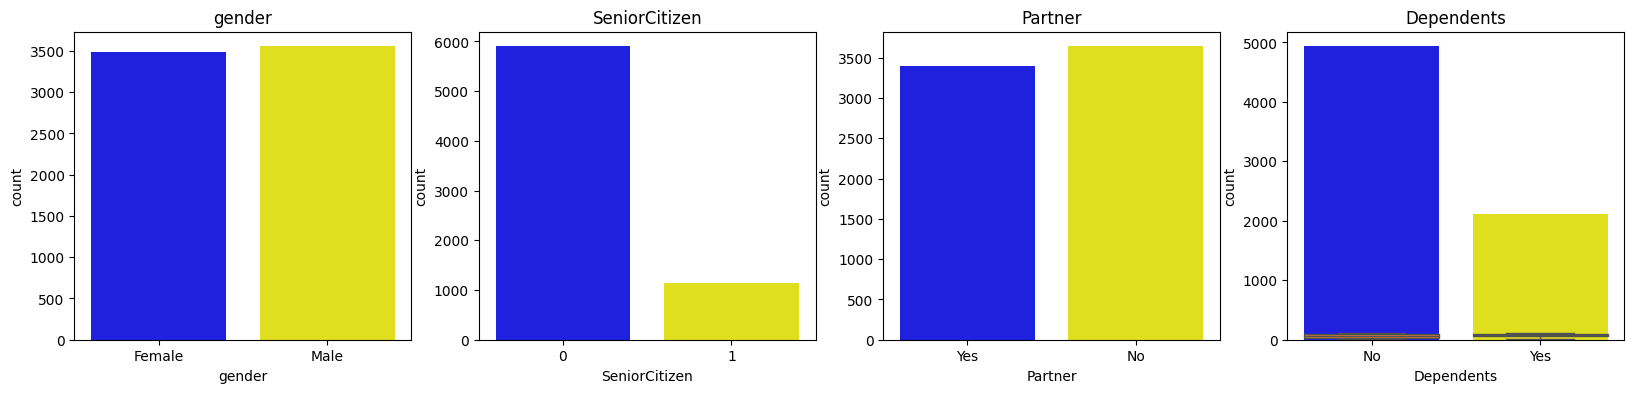

In [89]:
# Analyze Demographic Data


cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
numerical = cols

plt.figure(figsize=(20,4))

for i, col in enumerate(numerical):
    ax = plt.subplot(1, len(numerical), i+1)
    sns.countplot(x=str(col), data=df, palette=["blue", "yellow"])
    ax.set_title(f"{col}")
    
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

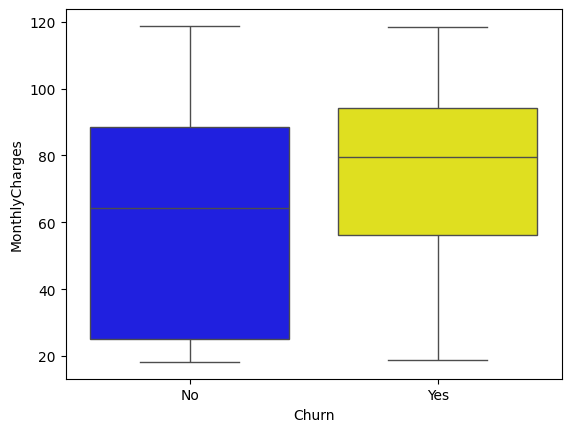

In [90]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette=["blue", "yellow"])

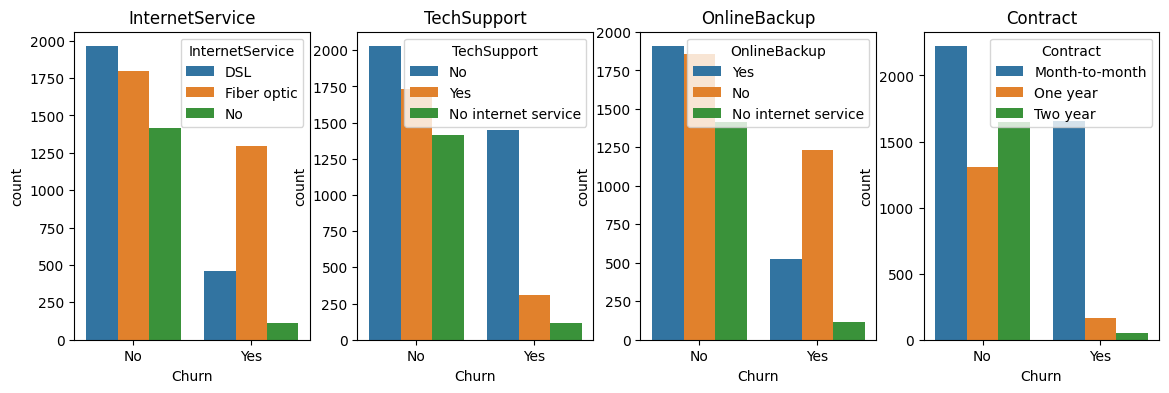

In [91]:
cols = ['InternetService',"TechSupport","OnlineBackup","Contract"]

plt.figure(figsize=(14,4))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x ="Churn", hue = str(col), data = df)
    ax.set_title(f"{col}")

In [92]:
# Clean Data
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Feature Engineering**

In [93]:
cat_features = df.drop(['customerID','TotalCharges','MonthlyCharges','SeniorCitizen','tenure'],axis=1)

cat_features.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [94]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df_cat = cat_features.apply(le.fit_transform)
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [95]:
num_features = df[['customerID','TotalCharges','MonthlyCharges','SeniorCitizen','tenure']]
finaldf = pd.merge(num_features, df_cat, left_index=True, right_index=True)

In [96]:
finaldf.head()

,customerID,TotalCharges,MonthlyCharges,SeniorCitizen,tenure,gender,Partner,Dependents,PhoneService,MultipleLines,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,29.85,29.85,0,1,0,1,0,0,1,...,0,2,0,0,0,0,0,1,2,0
1,5575-GNVDE,1889.50,56.95,0,34,1,0,0,1,0,...,2,0,2,0,0,0,1,0,3,0
2,3668-QPYBK,108.15,53.85,0,2,1,0,0,1,0,...,2,2,0,0,0,0,0,1,3,1
3,7795-CFOCW,1840.75,42.30,0,45,1,0,0,0,1,...,2,0,2,2,0,0,1,0,0,0
4,9237-HQITU,151.65,70.70,0,2,0,0,0,1,0,...,0,0,0,0,0,0,0,1,2,1


**Split Data**

In [97]:
finaldf = finaldf.dropna()
finaldf = finaldf.drop(['customerID'],axis=1)

X = finaldf.drop(['Churn'],axis=1)
y = finaldf['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Handle the Churn Imbalance Using SMOTE (Synthetic Minority Oversampling Technique)**

In [98]:
oversample = SMOTE(k_neighbors=5)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)
X_train, y_train = X_smote, y_smote
y_train.value_counts()

Churn
0    3452
1    3452
Name: count, dtype: int64

Train the Model

In [99]:
rf = RandomForestClassifier(random_state=46)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=46)

**Make Predictions**

In [100]:
preds = rf.predict(X_test)
pred_prob = rf.predict_proba(X_test)[:, 1]  # Get predicted probabilities for ROC and PR curves

print(accuracy_score(preds,y_test))

0.7720809995691512


**Experimenting: Binning Tenure**

In [101]:
# Cell 1: Feature Engineering - Binning Tenure

def bin_tenure(tenure):
    """
    Bins the tenure of a customer into predefined categories.

    Args:
        tenure (int): The tenure of the customer in months.

    Returns:
        str: The tenure category (e.g., "0-6 Months", "6-12 Months", etc.).
    """
    if tenure <= 6:
        return "0-6 Months"
    elif tenure <= 12:
        return "6-12 Months"
    elif tenure <= 24:
        return "12-24 Months"
    elif tenure <= 36:
        return "24-36 Months"
    else:
        return "36+ Months"

finaldf['Tenure_Binned'] = finaldf['tenure'].apply(bin_tenure)

print(finaldf[['tenure', 'Tenure_Binned']].head())  # Verify the new feature

   tenure Tenure_Binned
0       1    0-6 Months
1      34  24-36 Months
2       2    0-6 Months
3      45    36+ Months
4       2    0-6 Months


**Hyperparameter Tuning with GridSearchCV**

In [102]:
# Import Libraries for Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [103]:
# Hyperparameter Tuning with GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,  # 3-fold cross-validation
                           scoring='roc_auc', # Use ROC AUC for evaluation
                           verbose=2) # Show progress

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
[CV] END class_weight=balanced, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END class_weight=balanced, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END class_weight=balanced, max_depth=5, min_samples_leaf=1, min_samples

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=2)

In [104]:
print("Best parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_
print("Best ROC AUC Score:", grid_search.best_score_)

Best parameters: {'class_weight': 'balanced', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best ROC AUC Score: 0.9214760397867358


**Evaluating the Model on the Test Set**

In [105]:
#  Import Libraries for Model Evaluation
from sklearn.metrics import classification_report, roc_auc_score

In [106]:
# Evaluating the Model on the Test Set

y_pred = best_rf.predict(X_test)

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1711
           1       0.55      0.61      0.58       610

    accuracy                           0.77      2321
   macro avg       0.70      0.72      0.71      2321
weighted avg       0.78      0.77      0.77      2321

ROC AUC: 0.8208261873508926


**Evaluate the Model**

Accuracy: 0.7721
Precision: 0.5630
Recall: 0.5934
F1-score: 0.5778
ROC AUC: 0.8143


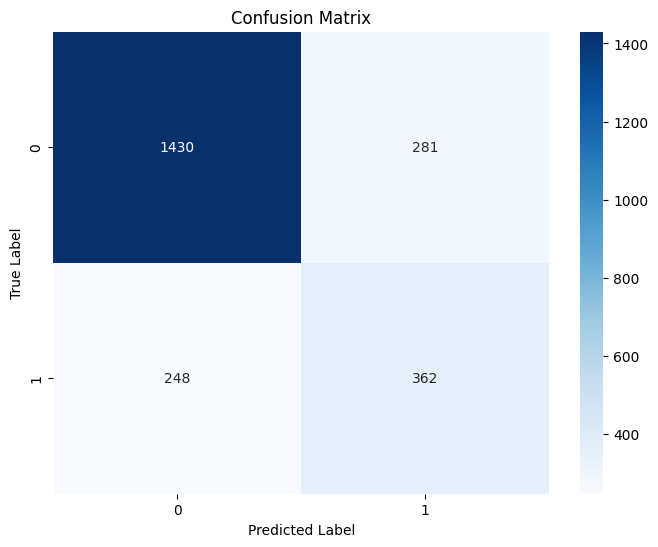

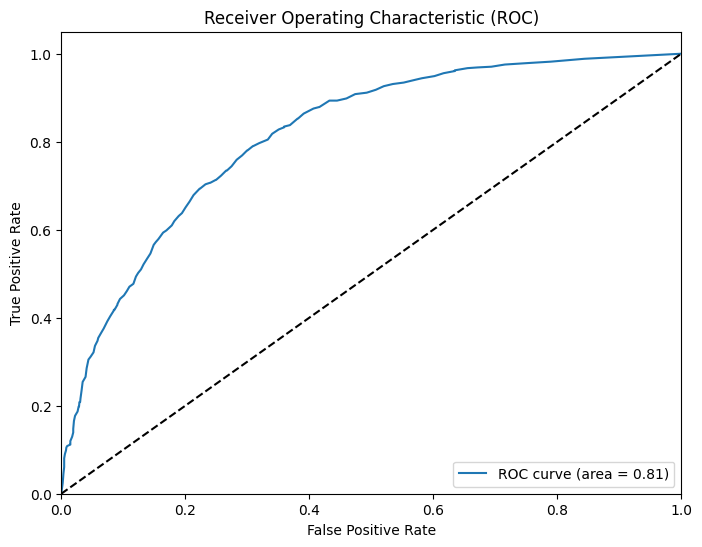

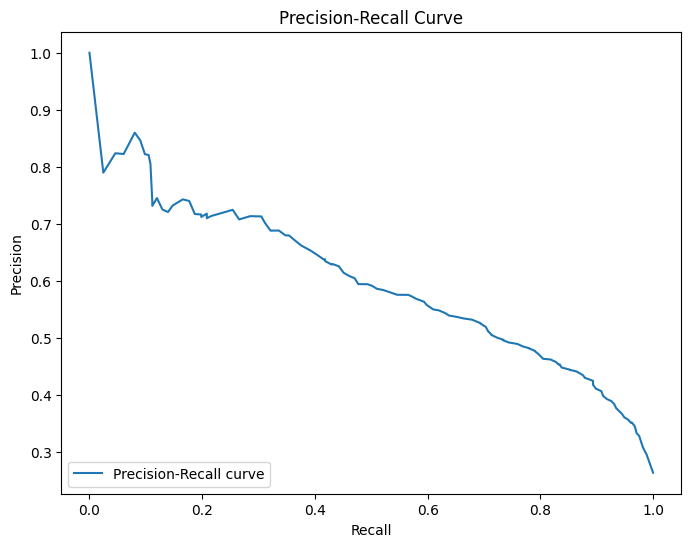

In [107]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
roc_auc = roc_auc_score(y_test, pred_prob)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()